In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
from datetime import datetime, timedelta
import matplotlib.ticker as ticker

In [2]:
folder_path = '../../Dataset/Cloudflare-dataset/traffic_data_from_cloudflare_0707/'  
json_files = [f for f in os.listdir(folder_path) if f.endswith('.json')]
# print(json_files)

In [3]:
def get_time_and_values(file):
    """
    Extracts timestamp and value pairs from a Cloudflare-style JSON file.

    Args:
        file (str): Path to the JSON file.

    Returns:
        list: A list of [timestamp, value] pairs, with value converted to float.
    """
    with open(file, 'r') as f:
        data = json.load(f)

    timestamps = data['result']['main']['timestamps']
    values = data['result']['main']['values']

    result = [[t, float(v)] for t, v in zip(timestamps, values)]
    return result


In [4]:
for json_file in json_files:
    json_file_path = folder_path + '/' + json_file
    country_name = json_file.split('_')[0]

    result = get_time_and_values(json_file_path)

    times = []
    values = []
    for item in result:

        # Record the hourly data within 24 hours
        if ':00:00Z' in item[0] and len(times) < 24:
            times.append(item[0])
            values.append(item[1])
    # Print max, min, and percentage difference of traffic values for a given country
    print(f'{country_name}: Max traffic = {max(values):.4f}, Min traffic = {min(values):.4f}, '
      f'Difference = {(max(values) - min(values)) * 100:.2f}%')

# Print the list of timestamps
print(times)


UY: Max traffic = 0.6514, Min traffic = 0.1645, Difference = 48.70%
TH: Max traffic = 0.9099, Min traffic = 0.3153, Difference = 59.47%
WS: Max traffic = 0.8340, Min traffic = 0.1476, Difference = 68.63%
ZW: Max traffic = 0.8340, Min traffic = 0.2834, Difference = 55.05%
TM: Max traffic = 0.7055, Min traffic = 0.1948, Difference = 51.07%
AG: Max traffic = 0.8597, Min traffic = 0.1931, Difference = 66.66%
DM: Max traffic = 0.7572, Min traffic = 0.1463, Difference = 61.09%
FJ: Max traffic = 0.9081, Min traffic = 0.1938, Difference = 71.43%
GF: Max traffic = 0.6765, Min traffic = 0.1030, Difference = 57.35%
BS: Max traffic = 0.9870, Min traffic = 0.2779, Difference = 70.91%
TV: Max traffic = 0.7363, Min traffic = 0.0234, Difference = 71.30%
PH: Max traffic = 0.8883, Min traffic = 0.2536, Difference = 63.48%
JE: Max traffic = 0.8020, Min traffic = 0.1205, Difference = 68.16%
MX: Max traffic = 0.8381, Min traffic = 0.1937, Difference = 64.43%
BR: Max traffic = 0.7732, Min traffic = 0.1662, 

In [5]:
countries = ['US', 'DE', 'JP']
labels = [
    'United States',
    'Germany',
    'Japan'
]

In [6]:
begin = "2025-07-05-14"
end = "2025-07-06-13"

In [7]:
time_length = len(times)

# Two-dimensional list, each row represents the total active IP of a country
raw_active_ips = []

for country in countries:
    for json_file in json_files:
        json_file_path = folder_path + '/' + json_file
        country_name = json_file.split('_')[0]

        if country_name == country:
            result = get_time_and_values(json_file_path)

            times = []
            values = []
            for item in result:
        
                # 记录24小时内的整点数据
                if ':00:00Z' in item[0] and len(times) < 24:
                    times.append(item[0])
                    values.append(item[1])

            raw_active_ips.append(values)

for item in raw_active_ips:
    print(item)

[0.526864, 0.589153, 0.603992, 0.598283, 0.619906, 0.636373, 0.656985, 0.675401, 0.681899, 0.688526, 0.712099, 0.727058, 0.775383, 0.829169, 0.822818, 0.662805, 0.633441, 0.588004, 0.495624, 0.430661, 0.430615, 0.454022, 0.44511, 0.499063]
[0.765099, 0.8269, 0.798261, 0.765966, 0.798311, 0.787165, 0.861582, 0.85397, 0.738949, 0.607341, 0.527475, 0.430473, 0.371975, 0.373224, 0.379653, 0.402661, 0.518739, 0.640352, 0.712627, 0.75298, 0.82797, 0.870935, 0.838067, 0.872136]
[0.862139, 0.939637, 0.799552, 0.599876, 0.452041, 0.367442, 0.371397, 0.458007, 0.545675, 0.596441, 0.659989, 0.694823, 0.716197, 0.718397, 0.749976, 0.702072, 0.754866, 0.791751, 0.744595, 0.670233, 0.678106, 0.738486, 0.760503, 0.863024]


In [8]:
# Normalize and change to the 0-1 position
active_ips = []
for row in raw_active_ips:
    # print(row)
    max_count = max(row)
    new_row = []
    for item in row:
        new_row.append(item*100/max_count)
    active_ips.append(new_row)

# fix
active_ips[0][13] = 100.0

for item in active_ips:
    print(item)

[63.541208125243465, 71.05342819135785, 72.84305129593605, 72.15453062041634, 74.76232227688202, 76.74828653748511, 79.23414888882725, 81.45516776435203, 82.2388439509919, 83.0380778827959, 85.88104475685898, 87.68514018252009, 93.51326448528587, 100.0, 99.2340524066867, 79.93605646134866, 76.39467949235922, 70.91485571698892, 59.77358053665779, 51.93886891574576, 51.93332119266398, 54.756268022562345, 53.68145697680449, 60.188333138359]
[87.72702881202014, 94.81319427245292, 91.52941743030902, 87.8264399130411, 91.53515048111761, 90.25713879486685, 98.78986763532292, 97.91706798022327, 84.72864323912783, 69.63833622279094, 60.48081950521478, 49.358471614518834, 42.65103149050148, 42.79424309970005, 43.53139877266848, 46.16951943274902, 59.479140867938014, 73.4234110276379, 81.710535971454, 86.33745195703422, 94.93588155975672, 99.86229211957769, 96.0936138400433, 100.0]
[91.75234691694772, 100.0, 85.09158323905935, 63.841249333519215, 48.10804597945803, 39.10467552895427, 39.525582751

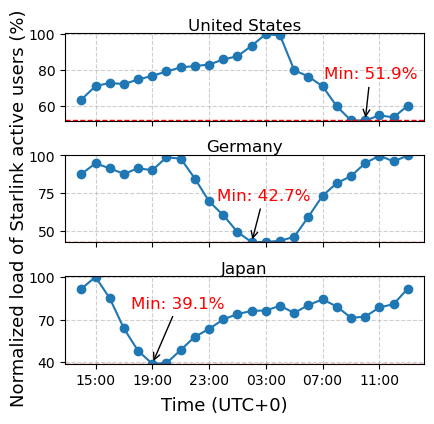

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Time range (0–23 hours)
origin_hours = range(48)

# Parse time strings
begin_list = begin.split('-')  # e.g., "2025-07-28-16"
end_list = end.split('-')      # e.g., "2025-07-29-15"

plt.rcParams['pdf.fonttype'] = 42

# Create subplots for each country
fig, axes = plt.subplots(len(countries), 1, figsize=(4.3, 4.1), sharex=True)

# Reference y-axis values and annotation offset per country
y_values = [
    [100, 80, 60],
    [100, 75, 50],
    [100, 70, 40]
]
red_loc = [
    [-30, 30],
    [-25, 30],
    [-15, 40]
]

# Plot traffic for each selected country
for i, (ax, country, data) in enumerate(zip(axes, countries, active_ips)):
    start_time = datetime(*map(int, begin_list))
    end_time = datetime(*map(int, end_list))

    # Generate hourly timestamps (24 hours)
    time_labels = [start_time + timedelta(hours=j) for j in range(24)]

    ax.plot(time_labels, data, label=country, marker='o')
    ax.set_title(labels[i], fontsize=12, pad=-30)
    ax.set_ylim(min(data) * 0.995, max(data) * 1.005)
    ax.grid(True, linestyle='--', alpha=0.6)

    # Format x-axis as HH:MM with 4-hour intervals
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))

    # Calculate percentage difference
    min_value = min(data)
    min_index = data.index(min_value)
    min_time = time_labels[min_index]

    # Draw horizontal dashed line at minimum value
    ax.axhline(y=min_value, color='r', linestyle='--', linewidth=1)

    # Annotate minimum point
    ax.annotate(f'Min: {min_value:.1f}%', 
                xy=(min_time, min_value), 
                xycoords='data', 
                xytext=(red_loc[i][0], red_loc[i][1]), 
                textcoords='offset points',
                arrowprops=dict(arrowstyle='->', lw=1),
                fontsize=12, color='red')

    # Set custom y-ticks for clarity
    yticks = [y for y in y_values[i] if min(data) <= y <= max(data)]
    ax.set_yticks(yticks)
    ax.set_yticklabels([str(y) for y in yticks], fontsize=10)

# Set common Y-axis and X-axis labels
fig.text(0.023, 0.5, 'Normalized load of Starlink active users (%)', ha='center', va='center', rotation='vertical', fontsize=13)
fig.text(0.5, 0.02, 'Time (UTC+0)', ha='center', va='center', fontsize=13)

# Final layout adjustments
plt.tight_layout()
plt.subplots_adjust(left=0.13, bottom=0.12)

# Save and show the plot
plt.savefig('figure3b.pdf', bbox_inches="tight")
plt.savefig('figure3b.png', bbox_inches="tight")